# Esercitazione 12 - Deep & Convolutional Neural Network image recognition </span>

### MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

## Inizializzazione della rete

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# ==============================================
# 1: LOAD AND PROCESS DATA
# Download the MNIST data from the web: import 
# the `mnist` module and use `load_data()`.
# It creates (pre-defined) training and test data sets.
# ==============================================
print("============================")
print("1: LOAD AND PROCESS DATA")

from tensorflow.keras.datasets import mnist

img_rows, img_cols = 28, 28 # input image dimensions (pixels) 
num_classes = 10 # output: 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape) # l'input
print('Y_train shape:', Y_train.shape) # label, ovvero gli output
print('X_test shape:', X_test.shape) # l'input
print('Y_test shape:', Y_test.shape) # label, ovvero gli output

# ==============================================
# 1.1: REFORMAT DATA
# we need to format the data in the correct shape.
# ==============================================
print("\n============================")
print("1.1: REFORMAT DATA")

# reshaping could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('Before to_categorical: ')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# look at an example of data point
#print('An example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()
#print("*not showing image*")

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('After to_categorical: ')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# ==============================================
# 2: DEFINE dNN & ITS ARCHITECTURE
# Use only `Dense` layers, for simplicity.
# ==============================================
print("\n============================")
print("2: DEFINE dNN & ITS ARCHITECTURE")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout      

def create_DNN():
    model = Sequential()                                # instantiate model
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu')) 
                                                        # specify input shape (28x28 pixels).
                                                        # Keras SEquential Model can infer the correct input/output dimensions of other layers
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))                             # Dropout, spegne alcuni neuroni,
                                                        # per rendere "più difficile" l'apprendimento.
                                                        # Evita overfitting e rende più "solido" il modello
                                                        # che impara a generalizzare.
    model.add(Dense(num_classes, activation='softmax')) # Softmax in uscita per un risutlato più netto possibile
                                                        # specify output shape (10 classes).
    return model

print('Model architecture created successfully!')

# ==============================================
# 3: OPTIMIZER & LOSS(=cost) FUNCTION
# Loss: classification problem --> `cross entropy`
#      (10 classes --> `categorical cross entropy`)
# Opt.: `sgd`;
#      (parameters [https://keras.io/]: 
#       learning rate, momentum, ...)
# Metr. (to test performance): 
#       classification problem --> `accuracy`
#      (% of correctly classified data points)
# ==============================================
print("\n============================")
print("3: OPTIMIZER & LOSS FUNCTION")

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy, # note that model uses **LOSS TO OPTIMIZE** ...
                  optimizer=SGD(),
                  metrics=['acc'])                            # ... and metrics only to **TEST PERFORMANCE**
    return model

print('Model compiled successfully, ready to train.')

1: LOAD AND PROCESS DATA
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)

1.1: REFORMAT DATA
Before to_categorical: 
X_train shape: (60000, 784)
X_test shape: (10000, 784)
After to_categorical: 
X_train shape: (60000, 784)
Y_train shape: (60000, 10)

2: DEFINE dNN & ITS ARCHITECTURE
Model architecture created successfully!

3: OPTIMIZER & LOSS FUNCTION
Model compiled successfully, ready to train.


## Training del modello

In [35]:
# ==============================================
# 4: MODEL TRAINING
# "Minibatches train": shuffling training data 
# improves stability. Thus, we train over epochs:
# in each we use all train data divided in batches.
# ==============================================
print("\n============================")
print("4: MODEL TRAINING")

my_batch_size = 32
epochs = 5 # use more than 5

model_DNN = compile_model() # create the dNN

# Train DNN and store training info in history
# Use the `fit()` method of the `Sequential` class
history = model_DNN.fit(X_train, Y_train,           # input and output data
                        batch_size=my_batch_size,   # optional
                        epochs=epochs,              # optional (but how can it work without?)
                        verbose=1,                  # monitoring training process
                        validation_data=(X_test, Y_test)# optional
                        )


4: MODEL TRAINING
Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.7280 - acc: 0.7886 - val_loss: 0.3029 - val_acc: 0.9175
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3727 - acc: 0.8942 - val_loss: 0.2341 - val_acc: 0.9322
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3016 - acc: 0.9160 - val_loss: 0.1968 - val_acc: 0.9422
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2597 - acc: 0.9276 - val_loss: 0.1722 - val_acc: 0.9480
Epoch 5/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2301 - acc: 0.9350 - val_loss: 0.1572 - val_acc: 0.9497



5: MODEL PERFORMANCE EVALUATION
313/313 [==============================] - 3s 10ms/step - loss: 0.1572 - acc: 0.9497
Test loss: 0.15721866488456726
Test accuracy: 0.9496999979019165


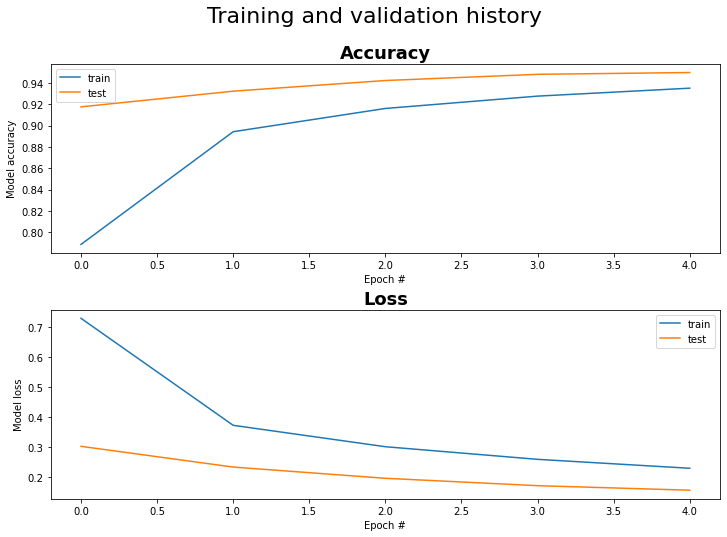

In [39]:
# ==============================================
# 5: MODEL PERFORMANCE EVALUATION
# Evaluate performance on (unseen) test data
# ==============================================
print("\n============================")
print("5: MODEL PERFORMANCE EVALUATION")

score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.suptitle("Training and validation history", fontsize = 22)

plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy", fontsize = 18, fontweight = "bold")
plt.ylabel('Model accuracy')
plt.xlabel('Epoch #')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss", fontsize = 18, fontweight = "bold")
plt.ylabel('Model loss')
plt.xlabel('Epoch #')
plt.legend(['train', 'test'], loc='best')

plt.subplots_adjust(hspace=0.3)
plt.show()

### Osservazioni

Il *Dropout* durante il training aumenta la **robustezza del modello**, il quale viene "obbligato" a imparare a generalizzare. Questo processo viene fatto **a spese dell'*accuracy***. Durante il test invece il *Dropout* viene **disattivato**, e permette alla rete di usare anche i neuroni meno significativi (*weak classifiers*). Per questo motivo l'**accuratezza del test è maggiore** di quella di training.



## Predizioni

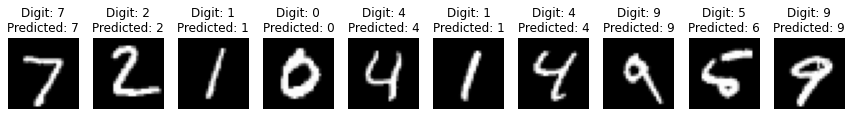

In [38]:
predictions = model_DNN.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

#### Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers.

In [49]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In [50]:
#THIS IS INCOMPLETE ... COMPLETE BEFORE EXECUTING IT

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

SyntaxError: positional argument follows keyword argument (287570744.py, line 8)

Train your DCNN and evaluate its performance proceeding exactly as before:

In [ ]:
# training parameters
batch_size = 32
epochs = # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In the end, **<span style="color:red">add the evaluation of your CNN performances</span>** like that used for the DNN.

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

In [ ]:
# TO LOAD FILES ON GOOGLE COLAB
#from google.colab import files
#upload = files.upload() #this will let you browse and choose the file to be uploaded

Image size: 28x28


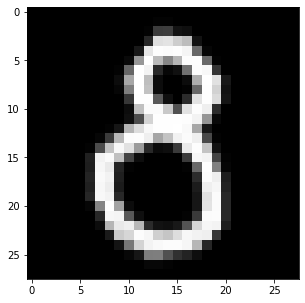

(28, 28)


In [ ]:
from PIL import Image
import os

digit_filename = "./Pictures/8b.png"
digit_in = Image.open(digit_filename).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

I use the previously trained DNN to predict the digit:

(28, 28)
(1, 784)


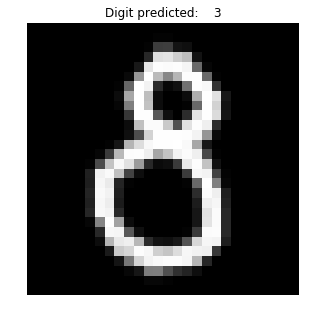

In [ ]:
print(data.shape)
data = data.reshape(1,xdim*ydim)
print(data.shape)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

### <span style="color:green">Supplementary information 1: Use of `gimp` </span>

- from the Unix shell type: `gimp` and hit `Return`
- File -> new (chose: 28x28 pixels)
- rascale the image to 800%
- Use the **brush** with dimension 2px to draw your digit
- Color -> invert (to have black background)
- Export the image as a `.png` file

That's all!

### <span style="color:green">Supplementary information 2: Display trained filters in your CNN</span>

Print your NN layers:

In [ ]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

Display your filters:

In [ ]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

### <span style="color:green">Supplementary information 3: Monitor layer outputs in your CNN</span>

In [ ]:
test_index = 0

from keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
%matplotlib inline
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)
display_activation(activations, 4, 2, 0)
# col_size x row_size must be <= Number of filters for the convolutional layer